# Credit Scoring PD(probability of default) Model

# Pre-Processing

In [225]:
# Import necessary libraries
from sklearn.linear_model import LogisticRegression  # For logistic regression model
from sklearn.model_selection import train_test_split  # For splitting data into training and testing sets

from sklearn import metrics  # For evaluating model performance

import pandas as pd  # For data manipulation
import numpy as np  # For numerical operations
import matplotlib.pyplot as plt  # For plotting
import seaborn as sns  # For enhanced plotting capabilities
sns.set()  # Set seaborn style

# Additional metrics and evaluation tools
from sklearn.metrics import confusion_matrix, classification_report  # For confusion matrix and classification report
from scipy import stats  # For statistical operations
from sklearn.metrics import roc_auc_score  # For ROC AUC score calculation
from sklearn.metrics import roc_curve  # For ROC curve plotting

In [227]:
# Read the CSV file containing credit score data
data = pd.read_csv(r"C:\Users\User\Desktop\Rashad\credit_score.csv")

# Set display option to show all columns
pd.set_option('display.max_columns', None)

# Display the first few rows of the dataset
data.head()

,ID,CustomerID,Month,Name,Age,SSN,Occupation,AnnualIncome,MonthlyInhandSalary,NumBankAccounts,NumCreditCard,InterestRate,NumofLoan,TypeofLoan,Delayfromduedate,NumofDelayedPayment,ChangedCreditLimit,NumCreditInquiries,OutstandingDebt,CreditUtilizationRatio,PaymentofMinAmount,TotalEMIpermonth,Amountinvestedmonthly,PaymentBehaviour,MonthlyBalance,CreditScore
0,0x1602,CUS0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7.0,11.27,4.0,809.98,26.822620,No,49.574949,80.415295,HighspentSmallvaluepayments,312.494089,Good
1,0x1603,CUS0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,NaN,11.27,4.0,809.98,31.944960,No,49.574949,118.280222,LowspentLargevaluepayments,284.629163,Good
2,0x1604,CUS0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7.0,NaN,4.0,809.98,28.609352,No,49.574949,81.699521,LowspentMediumvaluepayments,331.209863,Good
3,0x1605,CUS0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,4.0,6.27,4.0,809.98,31.377862,No,49.574949,199.458074,LowspentSmallvaluepayments,223.451310,Good
4,0x1606,CUS0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,NaN,11.27,4.0,809.98,24.797347,No,49.574949,41.420153,HighspentMediumvaluepayments,341.489231,Good


In [229]:
# Generate descriptive statistics for the dataset, including all columns
data.describe(include='all')

,ID,CustomerID,Month,Name,Age,SSN,Occupation,AnnualIncome,MonthlyInhandSalary,NumBankAccounts,NumCreditCard,InterestRate,NumofLoan,TypeofLoan,Delayfromduedate,NumofDelayedPayment,ChangedCreditLimit,NumCreditInquiries,OutstandingDebt,CreditUtilizationRatio,PaymentofMinAmount,TotalEMIpermonth,Amountinvestedmonthly,PaymentBehaviour,MonthlyBalance,CreditScore
count,87495,87495,87495,78779,87495.000000,87495,81317,8.749500e+04,74319.000000,87495.000000,87495.000000,87495.000000,87495.000000,77583,87495.000000,81400.000000,85654.000000,85789.000000,87495.000000,87495.000000,87495,87495.000000,79786.000000,87495,86437.000000,87495
unique,87495,12500,8,10139,NaN,12501,15,NaN,NaN,NaN,NaN,NaN,NaN,6260,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,7,NaN,3
top,0x1602,CUS0xd40,January,Langep,NaN,#F%$D@*&8,Lawyer,NaN,NaN,NaN,NaN,NaN,NaN,Not Specified,NaN,NaN,NaN,NaN,NaN,NaN,Yes,NaN,NaN,LowspentSmallvaluepayments,NaN,Standard
freq,1,8,10970,41,NaN,4857,5762,NaN,NaN,NaN,NaN,NaN,NaN,1208,NaN,NaN,NaN,NaN,NaN,NaN,45810,NaN,NaN,22237,NaN,46651
mean,NaN,NaN,NaN,NaN,110.467364,NaN,NaN,1.802404e+05,4193.181285,17.112646,22.664792,73.050871,7.019841,NaN,21.060403,30.904324,10.385851,27.734302,1426.716635,32.290526,NaN,1388.517947,195.482486,NaN,402.281023,NaN
std,NaN,NaN,NaN,NaN,686.549658,NaN,NaN,1.455212e+06,3179.195651,117.428586,129.806747,467.727237,60.352339,NaN,14.864558,225.495250,6.776714,193.011903,1155.824064,5.112418,NaN,8248.832131,199.357752,NaN,213.309331,NaN
min,NaN,NaN,NaN,NaN,-500.000000,NaN,NaN,7.005930e+03,303.645417,-1.000000,0.000000,1.000000,0.000000,NaN,-5.000000,-3.000000,-6.490000,0.000000,0.230000,20.000000,NaN,0.000000,0.000000,NaN,0.007760,NaN
25%,NaN,NaN,NaN,NaN,24.000000,NaN,NaN,1.943348e+04,1626.677917,3.000000,4.000000,8.000000,1.000000,NaN,10.000000,9.000000,5.340000,3.000000,566.400000,28.059063,NaN,30.453014,72.220853,NaN,270.107156,NaN
50%,NaN,NaN,NaN,NaN,33.000000,NaN,NaN,3.757975e+04,3095.905000,6.000000,5.000000,13.000000,3.000000,NaN,18.000000,14.000000,9.410000,6.000000,1166.230000,32.322206,NaN,69.285581,128.921405,NaN,336.698600,NaN
75%,NaN,NaN,NaN,NaN,42.000000,NaN,NaN,7.288608e+04,5967.930000,7.000000,7.000000,20.000000,5.000000,NaN,28.000000,18.000000,14.840000,9.000000,1948.980000,36.495606,NaN,161.405543,236.802042,NaN,470.180816,NaN


In [231]:
# Display the data types of each column in the dataset
data.dtypes

ID                         object
CustomerID                 object
Month                      object
Name                       object
Age                         int64
SSN                        object
Occupation                 object
AnnualIncome              float64
MonthlyInhandSalary       float64
NumBankAccounts             int64
NumCreditCard               int64
InterestRate                int64
NumofLoan                   int64
TypeofLoan                 object
Delayfromduedate            int64
NumofDelayedPayment       float64
ChangedCreditLimit        float64
NumCreditInquiries        float64
OutstandingDebt           float64
CreditUtilizationRatio    float64
PaymentofMinAmount         object
TotalEMIpermonth          float64
Amountinvestedmonthly     float64
PaymentBehaviour           object
MonthlyBalance            float64
CreditScore                object
dtype: object

In [232]:
# Drop specified columns from the dataset
data = data.drop(data[['ID','Occupation','SSN','Name','Month','CustomerID','PaymentofMinAmount']],axis=1)

In [233]:
data

,Age,AnnualIncome,MonthlyInhandSalary,NumBankAccounts,NumCreditCard,InterestRate,NumofLoan,TypeofLoan,Delayfromduedate,NumofDelayedPayment,ChangedCreditLimit,NumCreditInquiries,OutstandingDebt,CreditUtilizationRatio,TotalEMIpermonth,Amountinvestedmonthly,PaymentBehaviour,MonthlyBalance,CreditScore
0,23,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7.0,11.27,4.0,809.98,26.822620,49.574949,80.415295,HighspentSmallvaluepayments,312.494089,Good
1,23,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,NaN,11.27,4.0,809.98,31.944960,49.574949,118.280222,LowspentLargevaluepayments,284.629163,Good
2,-500,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7.0,NaN,4.0,809.98,28.609352,49.574949,81.699521,LowspentMediumvaluepayments,331.209863,Good
3,23,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,4.0,6.27,4.0,809.98,31.377862,49.574949,199.458074,LowspentSmallvaluepayments,223.451310,Good
4,23,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,NaN,11.27,4.0,809.98,24.797347,49.574949,41.420153,HighspentMediumvaluepayments,341.489231,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87490,25,39628.99,3359.415833,4,6,7,2,"Auto Loan, and Student Loan",20,6.0,9.50,3.0,502.38,39.323569,35.104023,140.581403,HighspentMediumvaluepayments,410.256158,Poor
87491,25,39628.99,3359.415833,4,6,7,2,"Auto Loan, and Student Loan",23,7.0,11.50,3.0,502.38,34.663572,35.104023,60.971333,HighspentLargevaluepayments,479.866228,Poor
87492,25,39628.99,3359.415833,4,6,7,2,"Auto Loan, and Student Loan",18,7.0,11.50,3.0,502.38,40.565631,35.104023,54.185950,HighspentMediumvaluepayments,496.651610,Poor
87493,25,39628.99,3359.415833,4,6,5729,2,"Auto Loan, and Student Loan",27,6.0,11.50,3.0,502.38,41.255522,35.104023,24.028477,HighspentLargevaluepayments,516.809083,Poor


In [235]:
# Add a new column 'Score' based on the values in the 'CreditScore' column
data['Score'] = data['CreditScore'].apply(lambda x: 1 if x == 'Poor' else 0)

In [236]:
# Drop the 'CreditScore' column from the dataset
data = data.drop(data[['CreditScore']],axis=1)

In [238]:
# Calculate the count of unique values in the 'Score' column
data['Score'].value_counts()

Score
0    62145
1    25350
Name: count, dtype: int64

In [240]:
# Check for missing values in each column of the dataset
data.isnull().sum()

Age                           0
AnnualIncome                  0
MonthlyInhandSalary       13176
NumBankAccounts               0
NumCreditCard                 0
InterestRate                  0
NumofLoan                     0
TypeofLoan                 9912
Delayfromduedate              0
NumofDelayedPayment        6095
ChangedCreditLimit         1841
NumCreditInquiries         1706
OutstandingDebt               0
CreditUtilizationRatio        0
TotalEMIpermonth              0
Amountinvestedmonthly      7709
PaymentBehaviour              0
MonthlyBalance             1058
Score                         0
dtype: int64

In [241]:
# Define a function to fill missing values
def fill_missing(column):
    # Check if the column dtype is 'object' (categorical)
    if column.dtype == 'object':
        # Fill missing values with the mode (most frequent value)
        return column.fillna(column.mode()[0])
    else:
        # Fill missing values with the mean
        return column.fillna(column.mean())

# Apply the fill_missing function to each column in the dataset
for column in data.columns:
    data[column] = fill_missing(data[column])

In [242]:
# Check for missing values in each column of the dataset
data.isnull().sum()

Age                       0
AnnualIncome              0
MonthlyInhandSalary       0
NumBankAccounts           0
NumCreditCard             0
InterestRate              0
NumofLoan                 0
TypeofLoan                0
Delayfromduedate          0
NumofDelayedPayment       0
ChangedCreditLimit        0
NumCreditInquiries        0
OutstandingDebt           0
CreditUtilizationRatio    0
TotalEMIpermonth          0
Amountinvestedmonthly     0
PaymentBehaviour          0
MonthlyBalance            0
Score                     0
dtype: int64

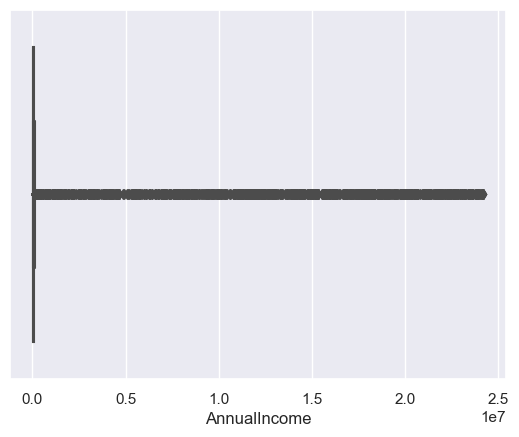

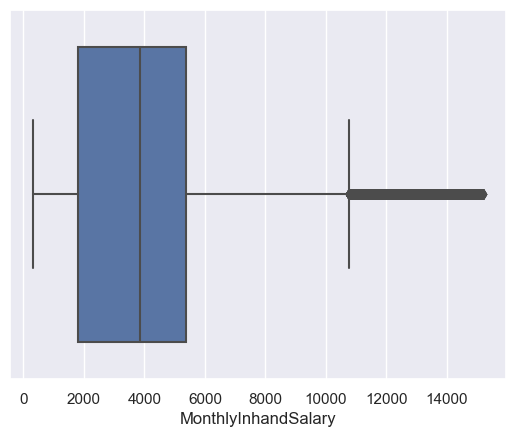

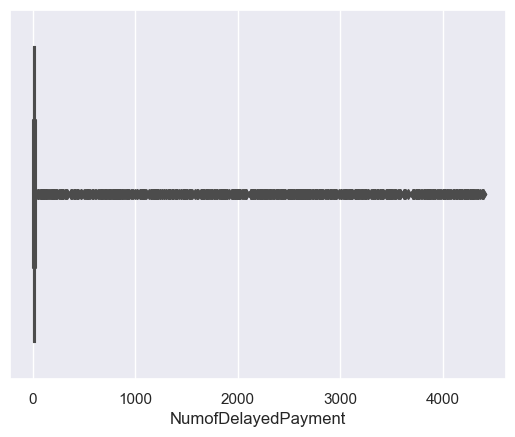

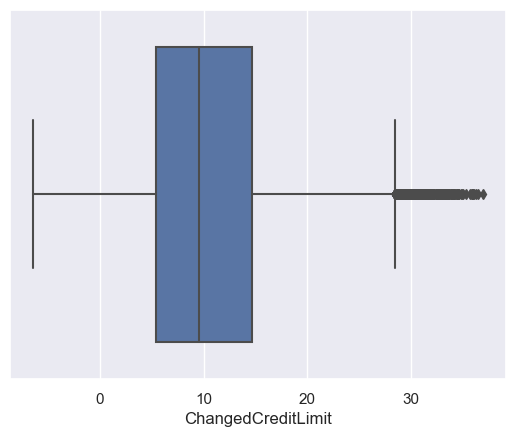

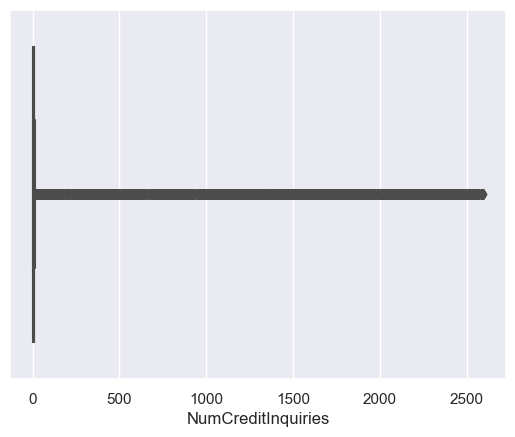

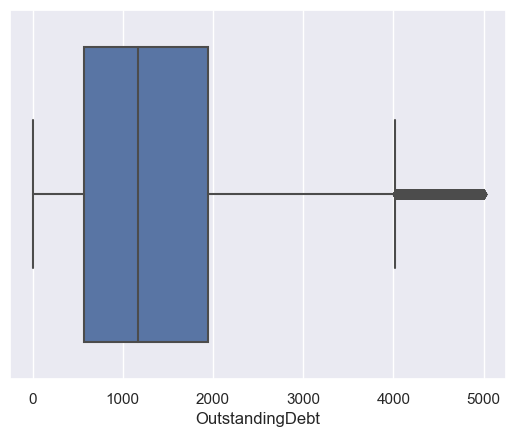

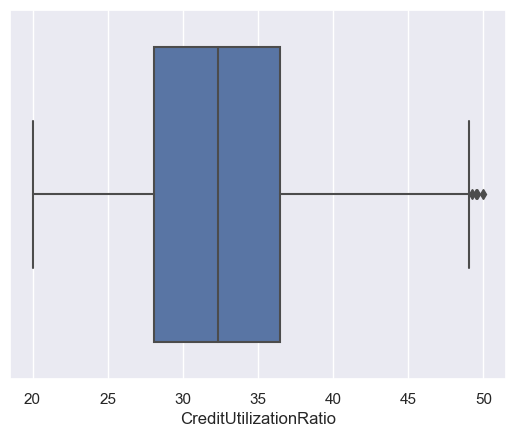

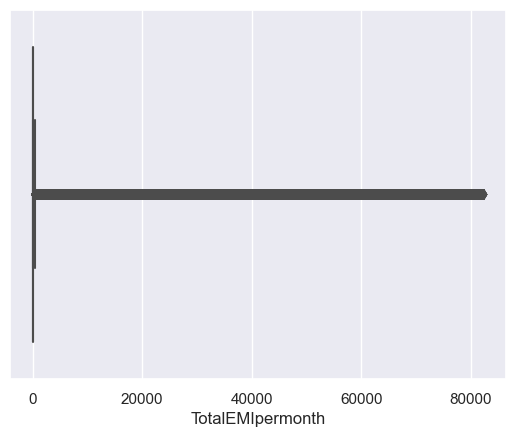

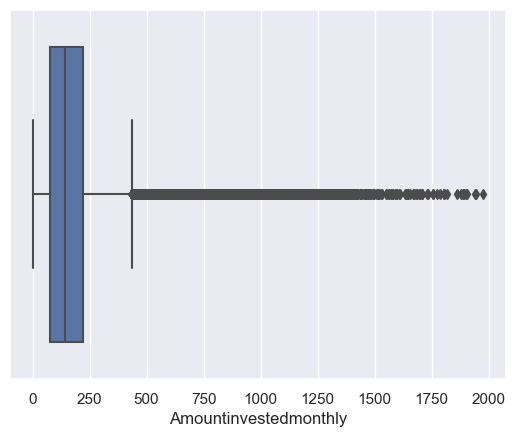

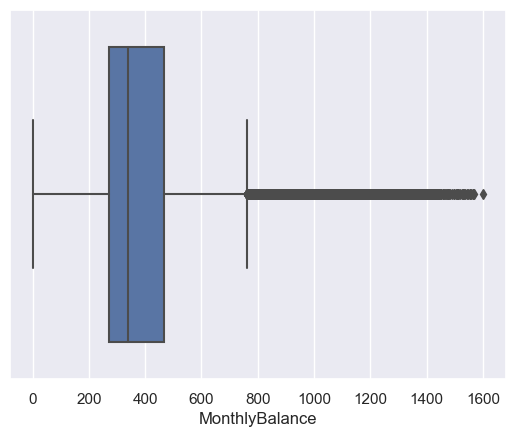

In [244]:
# Iterate through each column in the dataset
for i in data.columns:
    # Check if the data type is either 'int' or 'float'
    if data[i].dtypes =='int'or data[i].dtypes =='float':
        # Create a boxplot for the values in that column
        sns.boxplot(x=data[i], data=data)
        plt.show()  # Display the boxplot

In [245]:
# Select numerical columns from the dataset
numeric_columns = data.select_dtypes(include=[np.number])

# Calculate the first quartile (Q1)
Q1 = numeric_columns.quantile(0.25)

# Calculate the third quartile (Q3)
Q3 = numeric_columns.quantile(0.75)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Calculate the lower bound
lower = Q1 - 1.5 * IQR

# Calculate the upper bound
upper = Q3 + 1.5 * IQR

In [246]:
# Iterate through each numerical column in the dataset
for column in numeric_columns.columns:
    # Replace values greater than the upper bound with the upper bound
    data[column] = np.where(data[column] > upper[column], upper[column], data[column])
    # Replace values less than the lower bound with the lower bound
    data[column] = np.where(data[column] < lower[column], lower[column], data[column])

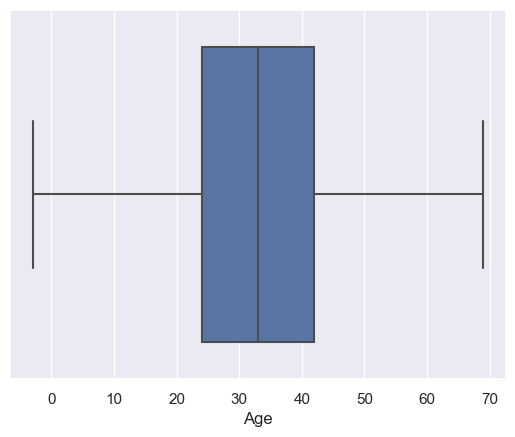

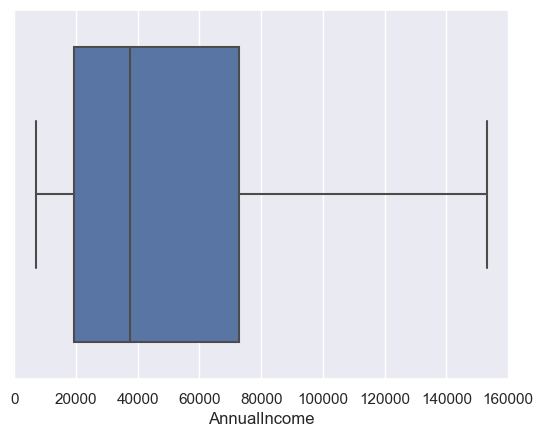

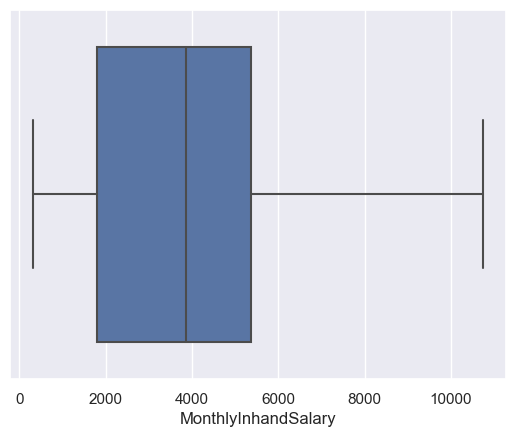

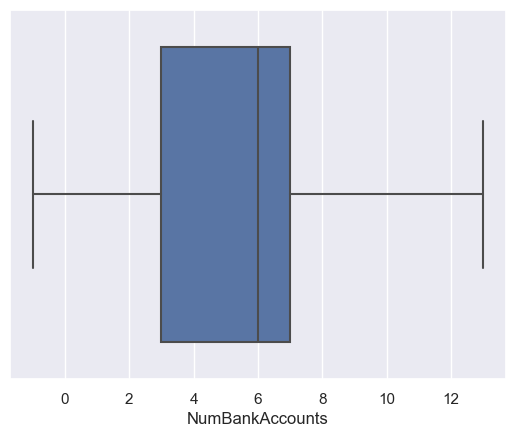

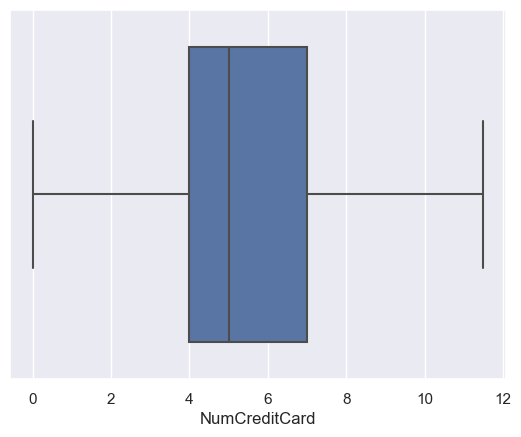

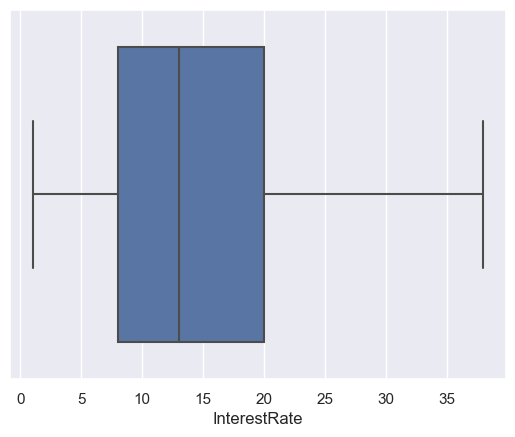

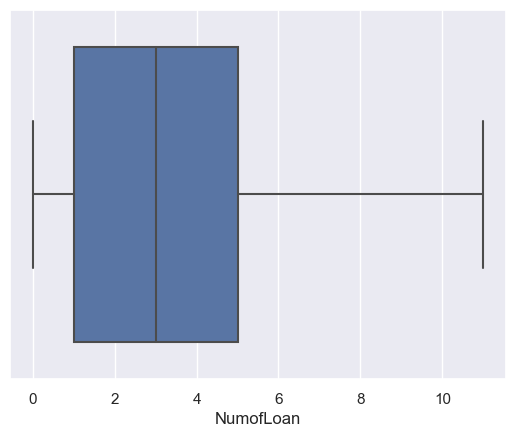

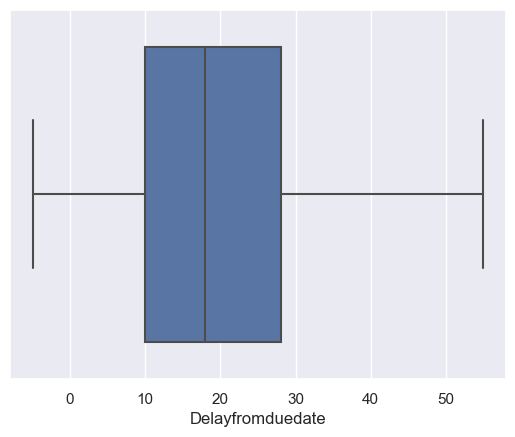

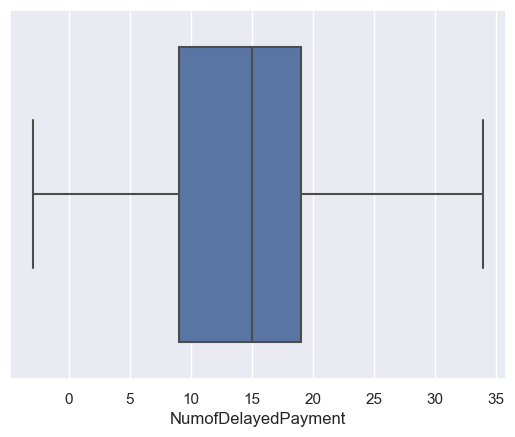

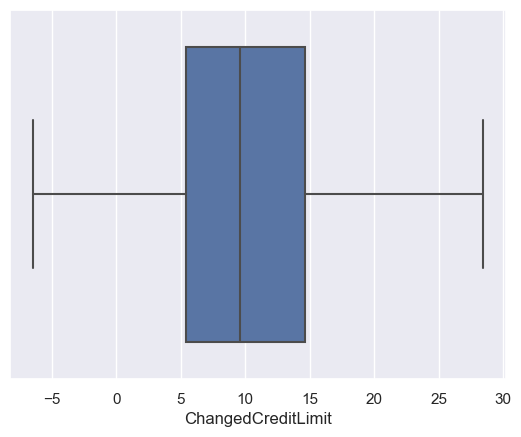

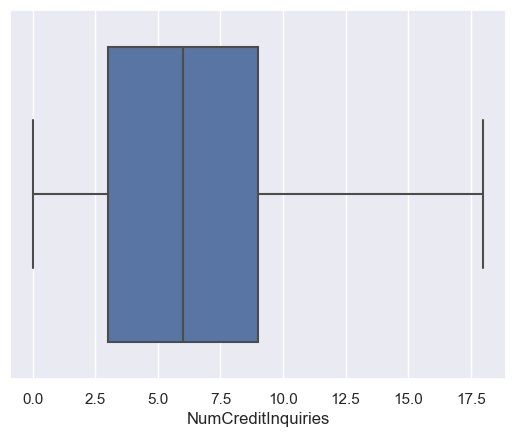

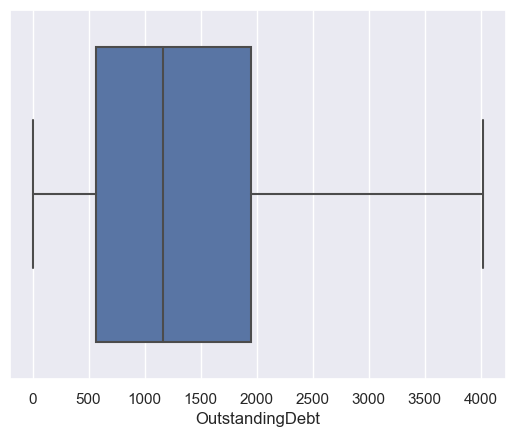

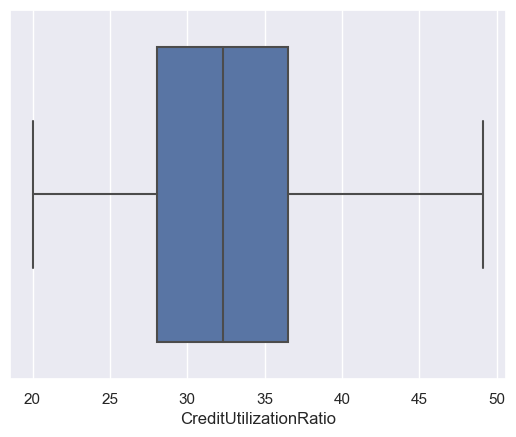

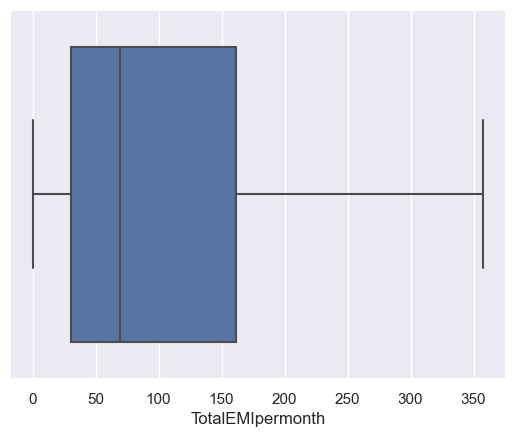

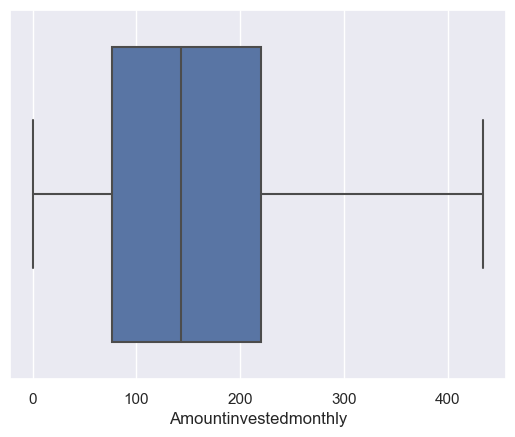

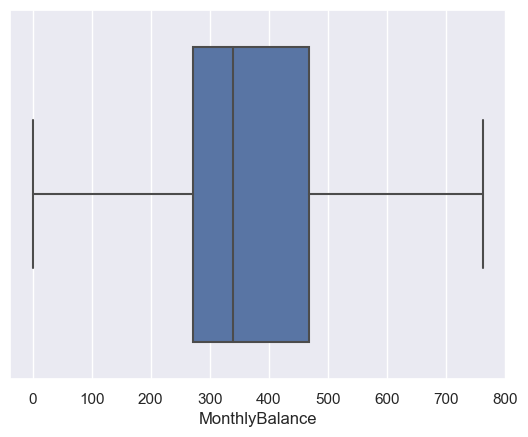

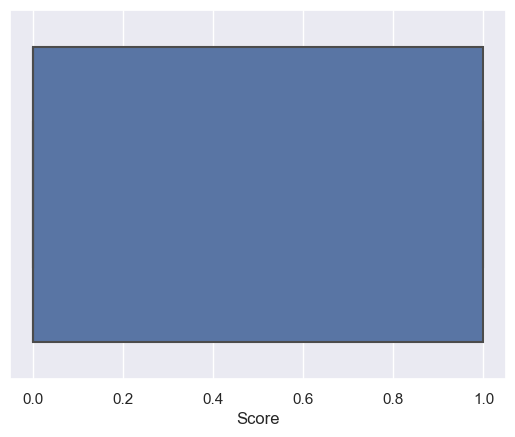

In [247]:
# Iterate through each column in the dataset
for i in data.columns:
    # Check if the data type is either 'int' or 'float'
    if data[i].dtypes =='int'or data[i].dtypes =='float':
        # Create a boxplot for the values in that column
        sns.boxplot(x=data[i], data=data)
        plt.show()  # Display the boxplot

In [249]:
# Iterate through each column in the dataset
for i in data.columns:
    # Check if the data type is numerical (either 'int64' or 'float64')
    if data[i].dtype in ['int64', 'float64']:
        
        # Perform the Kolmogorov-Smirnov test for normality
        kstest_statistic, kstest_p_value = stats.kstest(data[i], 'norm')
        # 'norm' inside indicates that the test is comparing the distribution of the data against a normal distribution
        
        # Print the results of the Kolmogorov-Smirnov test
        print(f'Column: {i}')
        print(f'Kolmogorov-Smirnov Test:')
        print(f'Test Statistic: {kstest_statistic}')
        print(f'p-value: {kstest_p_value}')
        
        # Check if the p-value is greater than 0.05 (common significance level)
        if kstest_p_value > 0.05:
            print('Data looks normally distributed')
            print()
        else:
            print('Data does not look normally distributed')
            print()

Column: Age
Kolmogorov-Smirnov Test:
Test Statistic: 0.9904794559689125
p-value: 0.0
Data does not look normally distributed

Column: AnnualIncome
Kolmogorov-Smirnov Test:
Test Statistic: 1.0
p-value: 0.0
Data does not look normally distributed

Column: MonthlyInhandSalary
Kolmogorov-Smirnov Test:
Test Statistic: 1.0
p-value: 0.0
Data does not look normally distributed

Column: NumBankAccounts
Kolmogorov-Smirnov Test:
Test Statistic: 0.889153405396812
p-value: 0.0
Data does not look normally distributed

Column: NumCreditCard
Kolmogorov-Smirnov Test:
Test Statistic: 0.9558429305125329
p-value: 0.0
Data does not look normally distributed

Column: InterestRate
Kolmogorov-Smirnov Test:
Test Statistic: 0.9505969164545867
p-value: 0.0
Data does not look normally distributed

Column: NumofLoan
Kolmogorov-Smirnov Test:
Test Statistic: 0.724195407796949
p-value: 0.0
Data does not look normally distributed

Column: Delayfromduedate
Kolmogorov-Smirnov Test:
Test Statistic: 0.953961834067347
p-va

In [251]:
import numpy as np

def target_correlation(data, target):
    # Calculate the correlation matrix using Spearman method for numerical variables
    corr_matrix = data.select_dtypes(include=[np.number]).corr(method='spearman')
    
    # Variables that have a correlation higher than 0.3 with the target
    high_corr_with_target = corr_matrix[target][corr_matrix[target].abs() > 0.3].index.tolist()
    
    # Variables within high_corr_with_target that have a correlation lower than 0.7 with each other
    correlated_vars = set()
    for var1 in high_corr_with_target:
        for var2 in high_corr_with_target:
            if var1 != var2 and abs(corr_matrix[var1][var2]) < 0.7:
                correlated_vars.add(var1)
                correlated_vars.add(var2)
                
    return list(correlated_vars)

# Example usage
target_result = target_correlation(data, 'Score')

In [252]:
target_result

['OutstandingDebt',
 'Score',
 'NumCreditInquiries',
 'Delayfromduedate',
 'InterestRate',
 'NumCreditCard']

In [254]:
# Importing necessary libraries
from statsmodels.stats.outliers_influence import variance_inflation_factor  # For calculating VIF
import pandas as pd  # For data manipulation

# Function to calculate VIF for given variables
def calculate_vif(data, variables):
    # Subset the data with the selected variables
    vif_data = data[variables]
    # Calculate VIF for each variable
    vif_values = [variance_inflation_factor(vif_data.values, i) for i in range(vif_data.shape[1])]
    # Create a DataFrame to store VIF values and corresponding features
    vif_result = pd.DataFrame({'VIF': vif_values, 'Features': variables})
    return vif_result

# Example usage
# Specifying the variables for which VIF is to be calculated
variables_to_check = [
    'Delayfromduedate',
    'NumCreditInquiries',
    'NumCreditCard',
    'InterestRate',
    'OutstandingDebt'
]

# Calculating VIF for specified variables
vif_result = calculate_vif(data, variables_to_check)

# Displaying the result
vif_result

,VIF,Features
0,5.466441,Delayfromduedate
1,4.406847,NumCreditInquiries
2,5.553570,NumCreditCard
3,6.401852,InterestRate
4,5.201546,OutstandingDebt


In [256]:
# List of selected columns, including specified numerical columns and all object-type columns
selected_columns = [
    'Delayfromduedate',     # Numerical column: Delay from due date
    'NumCreditInquiries',   # Numerical column: Number of credit inquiries
    'NumCreditCard',        # Numerical column: Number of credit cards
    'InterestRate',         # Numerical column: Interest rate
    'OutstandingDebt',      # Numerical column: Outstanding debt
    'Score'                 # Target column: Credit score
] + data.select_dtypes(include='object').columns.tolist()  # Add all object-type columns

# Explanation:
# - 'Delayfromduedate', 'NumCreditInquiries', 'NumCreditCard', 'InterestRate', 'OutstandingDebt', 'Score' are specified numerical columns.
# - 'data.select_dtypes(include='object').columns.tolist()' selects all object-type columns in the dataset and converts them to a list.
# - The '+' operator concatenates the specified numerical columns with the selected object-type columns.

# The resulting 'selected_columns' list contains all specified numerical columns and all object-type columns from the dataset.

In [257]:
# Select only the columns specified in the 'selected_columns' list
data = data[selected_columns]

In [258]:
# Retrieve the names of the columns in the updated DataFrame
data.columns

Index(['Delayfromduedate', 'NumCreditInquiries', 'NumCreditCard',
       'InterestRate', 'OutstandingDebt', 'Score', 'TypeofLoan',
       'PaymentBehaviour'],
      dtype='object')

In [260]:
# Iterate over each variable in the dataset except the last one (assuming the last one is the target variable)
for var in data.columns[:-1]:
    # Check if the variable is not of object type (i.e., numerical)
    if data[var].dtypes != object:
        
        # Calculate quartiles for the current variable
        q1 = data[var].quantile(0.25)
        q2 = data[var].quantile(0.5)
        q3 = data[var].quantile(0.75)

        # Define ranges based on quartiles
        ranges = [-np.inf, q1, q2, q3, np.inf]
        
        # Cut the variable into bins based on defined ranges and create a new categorical variable
        data['category_' + var] = pd.cut(data[var], bins=ranges, duplicates='drop')

        # Group the data by the new categorical variable and the target variable ('Score'), then count the occurrences
        grouped = data.groupby(['category_' + var, 'Score'])['Score'].count().unstack().reset_index()

        # Calculate the proportion of positive and negative cases for each category
        grouped['positive_prop'] = grouped[0] / grouped[0].sum()
        grouped['negative_prop'] = grouped[1] / grouped[1].sum()

        # Calculate the Weight of Evidence (WOE) for each category
        grouped['woe'] = np.log(grouped['positive_prop'] / grouped['negative_prop'])
        
        # Rename the WOE column
        grouped.rename(columns={'woe': var + '_woe'}, inplace=True)
        
        # Merge the WOE values back to the original dataset based on the new categorical variable
        data = data.merge(grouped[['category_' + var, var + '_woe']], how='left', on='category_' + var)

C:\Users\User\anaconda3\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [261]:
# Iterate over each variable in the dataset
for var in data.columns:
    # Check if the variable is of object type (i.e., categorical)
    if data[var].dtypes == object:
        
        # Group the data by the categorical variable and the target variable ('Score'), then count the occurrences
        grouped = data.groupby([var, 'Score'])['Score'].count().unstack().reset_index()

        # Calculate the proportion of positive and negative cases for each category
        grouped['positive_prop'] = grouped[0] / grouped[0].sum()
        grouped['negative_prop'] = grouped[1] / grouped[1].sum()

        # Calculate the Weight of Evidence (WOE) for each category
        grouped['woe'] = np.log(grouped['positive_prop'] / grouped['negative_prop'])

        # Rename the WOE column
        grouped.rename(columns={'woe':var+'_woe'}, inplace=True)
        
        # Merge the WOE values back to the original dataset based on the categorical variable
        data = data.merge(grouped[[var,var+'_woe']], how='left', on=var)

# Display the updated dataset with WOE-encoded categorical variables
data

,Delayfromduedate,NumCreditInquiries,NumCreditCard,InterestRate,OutstandingDebt,Score,TypeofLoan,PaymentBehaviour,category_Delayfromduedate,Delayfromduedate_woe,category_NumCreditInquiries,NumCreditInquiries_woe,category_NumCreditCard,NumCreditCard_woe,category_InterestRate,InterestRate_woe,category_OutstandingDebt,OutstandingDebt_woe,category_Score,Score_woe,TypeofLoan_woe,PaymentBehaviour_woe
0,3.0,4.0,4.0,3.0,809.98,0.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",HighspentSmallvaluepayments,"(-inf, 10.0]",1.050763,"(3.0, 6.0]",0.558452,"(-inf, 4.0]",1.077752,"(-inf, 8.0]",0.963156,"(566.4, 1166.23]",1.209568,"(-inf, 0.0]",inf,NaN,0.087011
1,-1.0,4.0,4.0,3.0,809.98,0.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",LowspentLargevaluepayments,"(-inf, 10.0]",1.050763,"(3.0, 6.0]",0.558452,"(-inf, 4.0]",1.077752,"(-inf, 8.0]",0.963156,"(566.4, 1166.23]",1.209568,"(-inf, 0.0]",inf,NaN,0.057730
2,3.0,4.0,4.0,3.0,809.98,0.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",LowspentMediumvaluepayments,"(-inf, 10.0]",1.050763,"(3.0, 6.0]",0.558452,"(-inf, 4.0]",1.077752,"(-inf, 8.0]",0.963156,"(566.4, 1166.23]",1.209568,"(-inf, 0.0]",inf,NaN,-0.070569
3,5.0,4.0,4.0,3.0,809.98,0.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",LowspentSmallvaluepayments,"(-inf, 10.0]",1.050763,"(3.0, 6.0]",0.558452,"(-inf, 4.0]",1.077752,"(-inf, 8.0]",0.963156,"(566.4, 1166.23]",1.209568,"(-inf, 0.0]",inf,NaN,-0.315796
4,6.0,4.0,4.0,3.0,809.98,0.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",HighspentMediumvaluepayments,"(-inf, 10.0]",1.050763,"(3.0, 6.0]",0.558452,"(-inf, 4.0]",1.077752,"(-inf, 8.0]",0.963156,"(566.4, 1166.23]",1.209568,"(-inf, 0.0]",inf,NaN,0.182672
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87490,20.0,3.0,6.0,7.0,502.38,1.0,"Auto Loan, and Student Loan",HighspentMediumvaluepayments,"(18.0, 28.0]",-0.100916,"(-inf, 3.0]",1.102930,"(5.0, 7.0]",-0.078484,"(-inf, 8.0]",0.963156,"(-inf, 566.4]",1.271917,"(0.0, 1.0]",-inf,0.13491,0.182672
87491,23.0,3.0,6.0,7.0,502.38,1.0,"Auto Loan, and Student Loan",HighspentLargevaluepayments,"(18.0, 28.0]",-0.100916,"(-inf, 3.0]",1.102930,"(5.0, 7.0]",-0.078484,"(-inf, 8.0]",0.963156,"(-inf, 566.4]",1.271917,"(0.0, 1.0]",-inf,0.13491,0.391003
87492,18.0,3.0,6.0,7.0,502.38,1.0,"Auto Loan, and Student Loan",HighspentMediumvaluepayments,"(10.0, 18.0]",0.496847,"(-inf, 3.0]",1.102930,"(5.0, 7.0]",-0.078484,"(-inf, 8.0]",0.963156,"(-inf, 566.4]",1.271917,"(0.0, 1.0]",-inf,0.13491,0.182672
87493,27.0,3.0,6.0,38.0,502.38,1.0,"Auto Loan, and Student Loan",HighspentLargevaluepayments,"(18.0, 28.0]",-0.100916,"(-inf, 3.0]",1.102930,"(5.0, 7.0]",-0.078484,"(20.0, inf]",-1.376154,"(-inf, 566.4]",1.271917,"(0.0, 1.0]",-inf,0.13491,0.391003


In [263]:
# Extract columns containing WOE-encoded features from the dataset
woe_features = data.filter(regex='_woe$', axis=1)

# Retrieve the names of the extracted columns
woe_features.columns

Index(['Delayfromduedate_woe', 'NumCreditInquiries_woe', 'NumCreditCard_woe',
       'InterestRate_woe', 'OutstandingDebt_woe', 'Score_woe',
       'TypeofLoan_woe', 'PaymentBehaviour_woe'],
      dtype='object')

In [264]:
data.isnull().sum()

Delayfromduedate                   0
NumCreditInquiries                 0
NumCreditCard                      0
InterestRate                       0
OutstandingDebt                    0
Score                              0
TypeofLoan                         0
PaymentBehaviour                   0
category_Delayfromduedate          0
Delayfromduedate_woe               0
category_NumCreditInquiries        0
NumCreditInquiries_woe             0
category_NumCreditCard             0
NumCreditCard_woe                  0
category_InterestRate              0
InterestRate_woe                   0
category_OutstandingDebt           0
OutstandingDebt_woe                0
category_Score                     0
Score_woe                          0
TypeofLoan_woe                 25425
PaymentBehaviour_woe               0
dtype: int64

In [294]:
# Features (X)
x1 = data[['Delayfromduedate_woe', 'NumCreditInquiries_woe', 'NumCreditCard_woe',
       'InterestRate_woe', 'OutstandingDebt_woe',
       'PaymentBehaviour_woe']]

# Target variable (y)
y = data['Score']

# Modeling

In [296]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x1, y, test_size=0.3, random_state=42)

In [298]:
def evaluate(model, X_test, y_test):
    # Predicting the target variable
    y_pred = model.predict(X_test)
    
    # Predicting probabilities of class 1 (positive class)
    y_prob = model.predict_proba(X_test)[:,1]

    # Calculating ROC AUC score
    roc_prob = roc_auc_score(y_test, y_prob)
    
    # Calculating Gini coefficient
    gini_prob = roc_prob * 2 - 1
    
    # Confusion matrix
    confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
    
    # Classification report
    report = classification_report(y_test, y_pred)
    
    # Printing model performance metrics
    print('Model Performance')
    print('Gini prob is', gini_prob * 100)
    print(confusion_matrix)
    print(report)

In [300]:
# Initialize a Logistic Regression classifier
clf = LogisticRegression()

# Fit the classifier to the training data
clf.fit(X_train, y_train)

LogisticRegression()

In [302]:
# Evaluating the performance of a classification model
result = evaluate(clf, X_test, y_test)

Model Performance
Gini prob is 56.903866086309776
[[15964  2632]
 [ 3202  4451]]
              precision    recall  f1-score   support

         0.0       0.83      0.86      0.85     18596
         1.0       0.63      0.58      0.60      7653

    accuracy                           0.78     26249
   macro avg       0.73      0.72      0.72     26249
weighted avg       0.77      0.78      0.78     26249



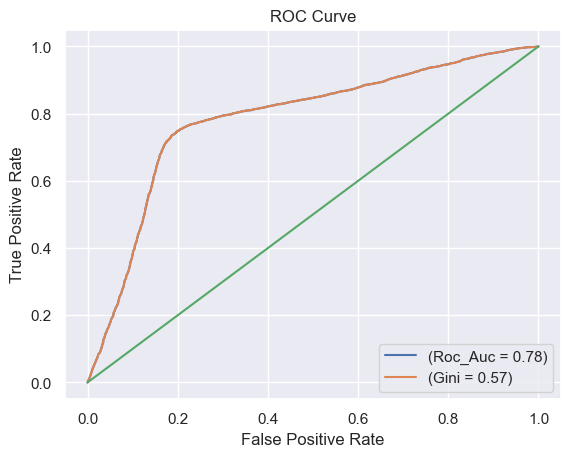

In [304]:
# Predict probabilities of the positive class
y_prob = clf.predict_proba(X_test)[:, 1]

# Calculate ROC AUC score
roc_auc = roc_auc_score(y_test, y_prob)

# Calculate Gini coefficient
gini = (2 * roc_auc_score(y_test, y_prob)) - 1

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, label='(ROC AUC = %0.2f)' % roc_auc)  # Plot ROC curve
plt.plot([0, 1], [0, 1])  # Plot diagonal line (random classifier)
plt.xlim([0.0, 1.0])  # Set x-axis limits
plt.ylim([0.0, 1.05])  # Set y-axis limits
plt.xlabel('False Positive Rate')  # Set x-axis label
plt.ylabel('True Positive Rate')  # Set y-axis label
plt.title('ROC Curve')  # Set plot title
plt.legend(loc='lower right')  # Add legend to the plot
plt.show()  # Display the plot

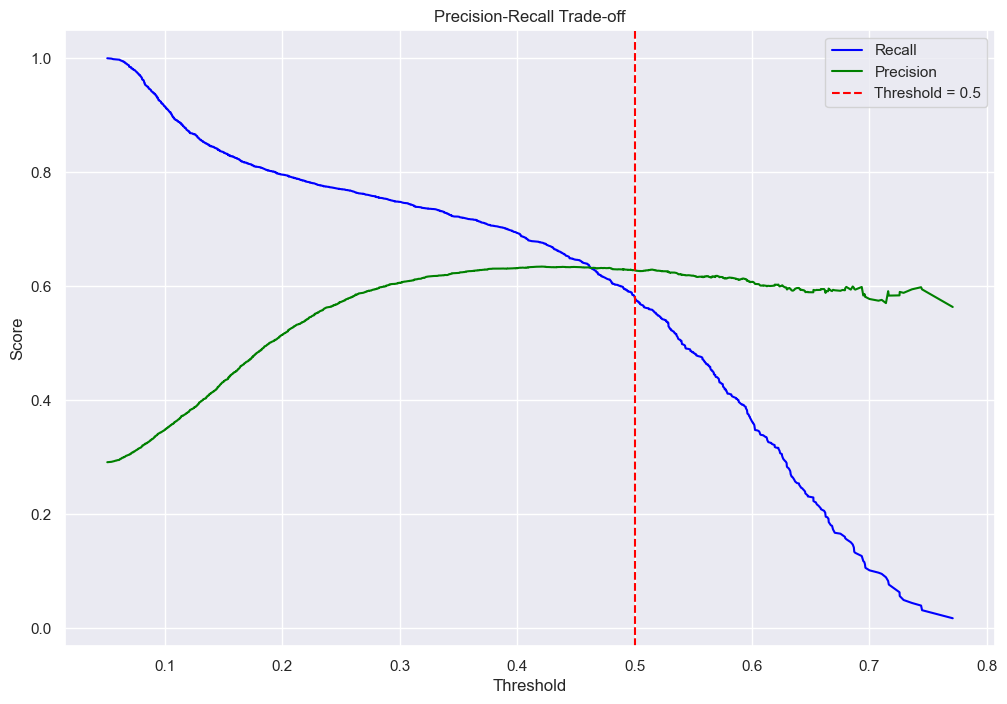

In [306]:
# Importing necessary libraries
from sklearn.metrics import precision_recall_curve

# Predict probabilities of the positive class
y_prob = clf.predict_proba(X_test)[:,1]

# Compute precision, recall, and thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_prob)

# Plot precision-recall trade-off
plt.figure(figsize=(12, 8))  # Set figure size
plt.plot(thresholds, recall[:-1], label='Recall', color='blue')  # Plot recall
plt.plot(thresholds, precision[:-1], label='Precision', color='green')  # Plot precision
plt.xlabel('Threshold')  # Set x-axis label
plt.ylabel('Score')  # Set y-axis label
plt.title('Precision-Recall Trade-off')  # Set plot title
plt.axvline(x=0.5, color='red', linestyle='--', label='Threshold = 0.5')  # Add vertical line at threshold = 0.5
plt.legend()  # Add legend to the plot
plt.grid(True)  # Add grid
plt.show()  # Display the plot

# Univariate analysis of Gini

In [308]:
def evaluate_custom(model, X_test, y_test):
    # Predicting the target variable
    y_pred = model.predict(X_test)
    
    # Predicting probabilities of class 1 (positive class)
    y_prob = model.predict_proba(X_test)[:, 1]
    
    # Define a custom threshold
    custom_threshold = 0.14

    # Applying the custom threshold to predict the target variable
    y_pred_custom_main = (y_prob >= custom_threshold).astype(int)

    # Calculate ROC AUC score based on the custom threshold
    roc_prob = roc_auc_score(y_test, y_pred_custom_main)
    
    # Calculate Gini coefficient based on the custom threshold
    gini_prob = roc_prob * 2 - 1
    
    # Compute confusion matrix based on the custom threshold
    confusion_matrix = metrics.confusion_matrix(y_test, y_pred_custom_main)
    
    # Generate classification report based on the custom threshold
    report = classification_report(y_test, y_pred_custom_main)
    
    # Print model performance metrics
    print('Model Performance')
    print('Gini prob is', gini_prob * 100)
    print(confusion_matrix)
    print(report)

In [309]:
# Evaluate the performance of the model using a custom threshold
evaluate_custom(clf, X_test, y_test)

Model Performance
Gini prob is 35.2441504697306
[[9431 9165]
 [1184 6469]]
              precision    recall  f1-score   support

         0.0       0.89      0.51      0.65     18596
         1.0       0.41      0.85      0.56      7653

    accuracy                           0.61     26249
   macro avg       0.65      0.68      0.60     26249
weighted avg       0.75      0.61      0.62     26249



In [342]:
# Selecting specific columns from the dataset
data = data[['OutstandingDebt_woe', 'InterestRate_woe', 'NumCreditInquiries_woe', 'Delayfromduedate_woe', 'Score']]

In [325]:
# Selected features (X)
x1 = data[['OutstandingDebt_woe', 'InterestRate_woe', 'NumCreditInquiries_woe', 'Delayfromduedate_woe']]

# Target variable (y)
y = data['Score']

In [326]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x1, y, test_size=0.3, random_state=42)

In [327]:
# Initialize a Logistic Regression classifier
clf = LogisticRegression()

# Fit the classifier to the training data
clf.fit(X_train, y_train)

LogisticRegression()

In [328]:
# Evaluate the performance of the model and capture the result
result = evaluate(clf, X_test, y_test)

Model Performance
Gini prob is 55.94338321781931
[[15949  2647]
 [ 3207  4446]]
              precision    recall  f1-score   support

         0.0       0.83      0.86      0.84     18596
         1.0       0.63      0.58      0.60      7653

    accuracy                           0.78     26249
   macro avg       0.73      0.72      0.72     26249
weighted avg       0.77      0.78      0.77     26249



# Deployment with woe

In [330]:
# Read the test data with WOE-encoded features from the specified Excel file
test_data_woe = pd.read_excel(r'C:\Users\User\Desktop\Rashad\test_data_with_woe.xlsx')

In [331]:
# Remove the 'Customer_ID' column from the test data
test_data_woe.drop(columns=['Customer_ID'], inplace=True)

In [333]:
# Predict the probabilities of each class for the test data using the trained Logistic Regression classifier
predicted_proba = clf.predict_proba(test_data_woe)

In [335]:
# Create a pandas Series containing the predicted probabilities of default (class 1)
pd_series = pd.Series(predicted_proba[:, 1], name='Probability_of_Default')

# Concatenate the test data with the predicted probabilities
result_df = pd.concat([test_data_woe, pd_series], axis=1)
result_df

,OutstandingDebt_woe,InterestRate_woe,NumCreditInquiries_woe,Delayfromduedate_woe,Probability_of_Default
0,-1.223150,-1.376154,-0.476098,-1.094846,0.679581
1,1.271917,1.149359,1.102930,1.050763,0.068260
2,-1.223150,-1.376154,-0.476098,-1.094846,0.679581
3,-0.352109,-0.028010,0.558452,0.496847,0.269805
4,-1.223150,-0.028010,-0.476098,-0.100916,0.472875
...,...,...,...,...,...
695,-1.223150,-1.376154,-1.068311,-0.100916,0.651622
696,-0.352109,1.149359,0.558452,-0.100916,0.210020
697,1.209568,1.149359,1.102930,-0.100916,0.095274
698,-1.223150,-1.376154,-0.476098,-1.094846,0.679581


# Deployment with real values (homework)

In [370]:
data

,OutstandingDebt_woe,InterestRate_woe,NumCreditInquiries_woe,Delayfromduedate_woe,Score
0,1.209568,0.963156,0.558452,1.050763,0.0
1,1.209568,0.963156,0.558452,1.050763,0.0
2,1.209568,0.963156,0.558452,1.050763,0.0
3,1.209568,0.963156,0.558452,1.050763,0.0
4,1.209568,0.963156,0.558452,1.050763,0.0
...,...,...,...,...,...
87490,1.271917,0.963156,1.102930,-0.100916,1.0
87491,1.271917,0.963156,1.102930,-0.100916,1.0
87492,1.271917,0.963156,1.102930,0.496847,1.0
87493,1.271917,-1.376154,1.102930,-0.100916,1.0


In [372]:
# Read the test data with real values from the specified Excel file
test_data = pd.read_excel(r'C:\Users\User\Desktop\Rashad\test_data_real_values.xlsx')

In [373]:
test_data

,OutstandingDebt,InterestRate,NumCreditInquiries,Delayfromduedate,CustomerID
0,632.93,17,0,20,53115
1,3259.17,24,11,53,35538
2,2313.60,22,11,55,15150
3,556.85,16,8,23,65145
4,1115.06,6,3,16,23224
...,...,...,...,...,...
995,1360.31,11,8,6,86109
996,1213.26,11,6,22,62411
997,1509.72,27,11,18,5554
998,356.69,18,9,25,70288


In [374]:
# Check for missing values in the test data
test_data.isnull().sum()

OutstandingDebt       0
InterestRate          0
NumCreditInquiries    0
Delayfromduedate      0
CustomerID            0
dtype: int64

In [375]:
# Remove the 'CustomerID' column from the test data
test_data.drop(columns=['CustomerID'], inplace=True)

In [376]:
# Define a function to apply WOE (Weight of Evidence) transformation to a series using a given WOE mapping
def apply_woe(data, woe_mapping):
    return data.map(woe_mapping)

In [377]:
# Iterate through each feature in the test data
for feature in test_data.columns:
    # Generate the name of the WOE transformed feature
    woe_feature = feature + '_woe'
    
    # Check if the WOE transformed feature does not exist in the test data but exists in the trained data
    if woe_feature not in test_data.columns and woe_feature in data.columns:
        # Add the WOE transformed feature from the trained data to the test data
        test_data[woe_feature] = data[woe_feature]
    # Check if the WOE transformed feature already exists in the test data
    elif woe_feature in test_data.columns:
        print(f"Column {woe_feature} already exists in test data.")
    # If the WOE transformed feature is not found in the trained data
    else:
        print(f"WOE transformed feature {woe_feature} not found in trained data.")

In [378]:
test_data

,OutstandingDebt,InterestRate,NumCreditInquiries,Delayfromduedate,OutstandingDebt_woe,InterestRate_woe,NumCreditInquiries_woe,Delayfromduedate_woe
0,632.93,17,0,20,1.209568,0.963156,0.558452,1.050763
1,3259.17,24,11,53,1.209568,0.963156,0.558452,1.050763
2,2313.60,22,11,55,1.209568,0.963156,0.558452,1.050763
3,556.85,16,8,23,1.209568,0.963156,0.558452,1.050763
4,1115.06,6,3,16,1.209568,0.963156,0.558452,1.050763
...,...,...,...,...,...,...,...,...
995,1360.31,11,8,6,1.209568,0.963156,1.102930,-0.100916
996,1213.26,11,6,22,1.209568,0.963156,0.558452,-0.100916
997,1509.72,27,11,18,1.209568,0.963156,0.558452,-1.094846
998,356.69,18,9,25,-0.352109,0.963156,1.102930,1.050763


In [380]:
# Remove the original non-WOE transformed features from the test data
test_data = test_data.drop(test_data[['OutstandingDebt', 'InterestRate', 'NumCreditInquiries', 'Delayfromduedate']], axis=1)

In [381]:
test_data

,OutstandingDebt_woe,InterestRate_woe,NumCreditInquiries_woe,Delayfromduedate_woe
0,1.209568,0.963156,0.558452,1.050763
1,1.209568,0.963156,0.558452,1.050763
2,1.209568,0.963156,0.558452,1.050763
3,1.209568,0.963156,0.558452,1.050763
4,1.209568,0.963156,0.558452,1.050763
...,...,...,...,...
995,1.209568,0.963156,1.102930,-0.100916
996,1.209568,0.963156,0.558452,-0.100916
997,1.209568,0.963156,0.558452,-1.094846
998,-0.352109,0.963156,1.102930,1.050763


In [382]:
# Predict the probabilities of each class for the test data using the trained Logistic Regression classifier
predicted_proba_dep = clf.predict_proba(test_data)

In [384]:
# Create a pandas Series containing the predicted probabilities of default (class 1)
pd_series_dep = pd.Series(predicted_proba_dep[:, 1], name='Probability_of_Default')

# Concatenate the test data with the predicted probabilities
result_df_dep = pd.concat([test_data, pd_series_dep], axis=1)
result_df_dep

,OutstandingDebt_woe,InterestRate_woe,NumCreditInquiries_woe,Delayfromduedate_woe,Probability_of_Default
0,1.209568,0.963156,0.558452,1.050763,0.679581
1,1.209568,0.963156,0.558452,1.050763,0.068260
2,1.209568,0.963156,0.558452,1.050763,0.679581
3,1.209568,0.963156,0.558452,1.050763,0.269805
4,1.209568,0.963156,0.558452,1.050763,0.472875
...,...,...,...,...,...
995,1.209568,0.963156,1.102930,-0.100916,NaN
996,1.209568,0.963156,0.558452,-0.100916,NaN
997,1.209568,0.963156,0.558452,-1.094846,NaN
998,-0.352109,0.963156,1.102930,1.050763,NaN
